In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# 2. Load the dataset.

In [2]:
sa = pd.read_csv(r"/content/Mall_Customers.csv")
sa.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 3. Perform Below Visualizations.

# a) Univariate Analysis.

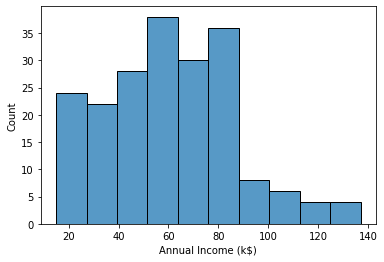

In [6]:
sns.histplot(sa['Annual Income (k$)'])

# b) Bi- Variate Analysis.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


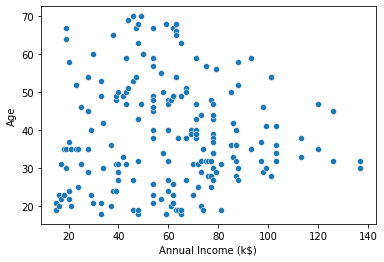

In [8]:
sns.scatterplot(sa['Annual Income (k$)'],sa['Age'])

# c) Multi-Variate Analysis.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


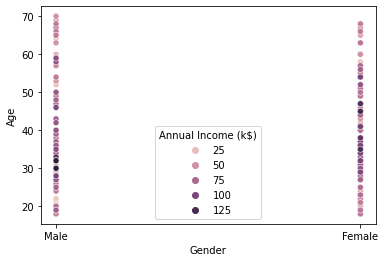

In [10]:
sns.scatterplot(sa['Gender'],sa['Age'],sa['Annual Income (k$)'])

# 4. Perform descriptive statistics on the dataset.

In [11]:
sa.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [12]:
sa.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [13]:
sa.mode()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,32.0,54.0,42.0
1,2,NaN,NaN,78.0,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
195,196,NaN,NaN,NaN,NaN
196,197,NaN,NaN,NaN,NaN
197,198,NaN,NaN,NaN,NaN
198,199,NaN,NaN,NaN,NaN


In [14]:
sa.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# 5. Check for Missing values and deal with them.

In [16]:
sa.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

# 6. Find the outliers and replace them outliers.

In [17]:
m = sa.quantile([0.95,0.65])
m

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.95,190.05,66.05,103.0,92.00
0.65,130.35,44.00,71.0,58.35


In [19]:
i = m.iloc[0]-m.iloc[1]
i

CustomerID                59.70
Age                       22.05
Annual Income (k$)        32.00
Spending Score (1-100)    33.65
dtype: float64

In [21]:
ms = m.iloc[0]+(1.5*i)
ms

CustomerID                279.600
Age                        99.125
Annual Income (k$)        151.000
Spending Score (1-100)    142.475
dtype: float64

In [23]:
A = m.iloc[1]-(1.5*i)
A

CustomerID                40.800
Age                       10.925
Annual Income (k$)        23.000
Spending Score (1-100)     7.875
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


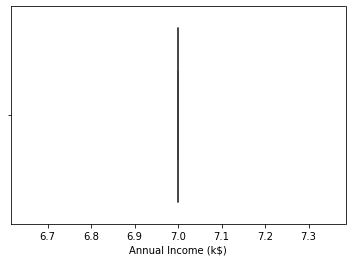

In [26]:
sa['Annual Income (k$)']=np.where(sa['Annual Income (k$)']>10,7,sa['Annual Income (k$)'])
sns.boxplot(sa['Annual Income (k$)'])

# 7. Check for Categorical columns and perform encoding.

In [27]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
L = LabelEncoder()
O=OneHotEncoder()
sa['Gender']=L.fit_transform(sa['Gender'])
sa.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,7,7,39
1,2,1,7,7,81
2,3,0,7,7,6
3,4,0,7,7,77
4,5,0,7,7,40


# 8. Scaling the data.

In [28]:
S = sa.drop('Annual Income (k$)',axis=1) 
A = sa['Annual Income (k$)'] 
S

,CustomerID,Gender,Age,Spending Score (1-100)
0,1,1,7,39
1,2,1,7,81
2,3,0,7,6
3,4,0,7,77
4,5,0,7,40
...,...,...,...,...
195,196,0,7,79
196,197,0,7,28
197,198,1,7,74
198,199,1,7,18


In [29]:
A

0      7
1      7
2      7
3      7
4      7
      ..
195    7
196    7
197    7
198    7
199    7
Name: Annual Income (k$), Length: 200, dtype: int64

In [30]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
MM =MinMaxScaler()
S_scale=MM.fit_transform(S)
S_scale

array([[0.        , 1.        , 0.        , 0.3877551 ],
       [0.00502513, 1.        , 0.        , 0.81632653],
       [0.01005025, 0.        , 0.        , 0.05102041],
       [0.01507538, 0.        , 0.        , 0.7755102 ],
       [0.0201005 , 0.        , 0.        , 0.39795918],
       [0.02512563, 0.        , 0.        , 0.76530612],
       [0.03015075, 0.        , 0.        , 0.05102041],
       [0.03517588, 0.        , 0.        , 0.94897959],
       [0.04020101, 1.        , 0.        , 0.02040816],
       [0.04522613, 0.        , 0.        , 0.7244898 ],
       [0.05025126, 1.        , 0.        , 0.13265306],
       [0.05527638, 0.        , 0.        , 1.        ],
       [0.06030151, 0.        , 0.        , 0.14285714],
       [0.06532663, 0.        , 0.        , 0.7755102 ],
       [0.07035176, 1.        , 0.        , 0.12244898],
       [0.07537688, 1.        , 0.        , 0.79591837],
       [0.08040201, 0.        , 0.        , 0.34693878],
       [0.08542714, 1.        ,

# 9. Perform any of the clustering algorithms.

In [32]:
from sklearn.cluster import KMeans
ME=KMeans()
cluster=ME.fit_predict(S_scale)
cluster

array([1, 1, 7, 2, 7, 2, 7, 2, 1, 2, 1, 2, 7, 2, 1, 1, 7, 1, 1, 2, 1, 1,
       7, 1, 7, 1, 7, 1, 7, 2, 1, 2, 1, 1, 7, 2, 7, 2, 7, 2, 7, 1, 1, 2,
       7, 2, 6, 6, 6, 6, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 1, 1, 6, 6, 1, 1,
       6, 6, 1, 6, 1, 6, 6, 6, 1, 1, 6, 1, 6, 6, 1, 1, 1, 6, 6, 1, 6, 6,
       6, 6, 6, 1, 1, 6, 6, 1, 6, 6, 1, 1, 6, 6, 1, 1, 1, 6, 6, 1, 1, 1,
       1, 6, 6, 1, 6, 6, 6, 6, 6, 6, 1, 6, 6, 5, 0, 4, 3, 5, 3, 5, 3, 5,
       0, 4, 3, 4, 0, 5, 3, 4, 0, 5, 0, 4, 3, 5, 3, 4, 0, 5, 3, 5, 0, 4,
       0, 4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 0, 5, 3, 5, 3, 5, 0, 4,
       3, 5, 3, 5, 0, 4, 3, 4, 0, 5, 0, 5, 0, 4, 0, 4, 3, 4, 0, 4, 0, 5,
       3, 5], dtype=int32)

# 10. Add the cluster data with the primary dataset.

In [33]:
sa.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [34]:
MA = pd.DataFrame(S_scale,columns=['Gender','Age','Annual Income (k$)','Spending Score (1-100)'])
MA.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.0,0.387755
1,0.005025,1.0,0.0,0.816327
2,0.010050,0.0,0.0,0.051020
3,0.015075,0.0,0.0,0.775510
4,0.020101,0.0,0.0,0.397959


In [35]:
MA['Cluster']=pd.Series(cluster)
MA.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0.000000,1.0,0.0,0.387755,1
1,0.005025,1.0,0.0,0.816327,1
2,0.010050,0.0,0.0,0.051020,7
3,0.015075,0.0,0.0,0.775510,2
4,0.020101,0.0,0.0,0.397959,7


# 11. Split the data into dependent and independent variables.

In [36]:
X = MA.iloc[:,0:4]
X

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.0,0.387755
1,0.005025,1.0,0.0,0.816327
2,0.010050,0.0,0.0,0.051020
3,0.015075,0.0,0.0,0.775510
4,0.020101,0.0,0.0,0.397959
...,...,...,...,...
195,0.979899,0.0,0.0,0.795918
196,0.984925,0.0,0.0,0.275510
197,0.989950,1.0,0.0,0.744898
198,0.994975,1.0,0.0,0.173469


In [37]:
Y = MA['Cluster']
Y

0      1
1      1
2      7
3      2
4      7
      ..
195    4
196    0
197    5
198    3
199    5
Name: Cluster, Length: 200, dtype: int32

# 12. Split the data into training and testing.

In [39]:
from sklearn.model_selection import train_test_split
S_train,S_test,A_train,A_test=train_test_split(S_scale,Y,test_size=0.3,random_state=1)

# 13. Build the Model.

# 14. Train the Model.

In [41]:
from sklearn.linear_model import LogisticRegression
mi = LogisticRegression()
mi.fit(S_train,A_train)

LogisticRegression()

# 15. Test the Model

In [42]:
predict_test=mi.predict(S_test)
predict_test

array([6, 6, 6, 1, 0, 3, 1, 6, 6, 0, 5, 1, 6, 6, 1, 6, 4, 6, 0, 1, 1, 6,
       6, 6, 6, 3, 6, 6, 4, 1, 6, 4, 0, 5, 3, 6, 0, 6, 6, 3, 1, 1, 4, 1,
       6, 6, 6, 6, 5, 6, 1, 1, 6, 1, 1, 5, 4, 6, 5, 3], dtype=int32)

In [43]:
A_test

58     6
40     7
34     7
102    1
184    0
198    3
95     1
4      7
29     2
168    0
171    5
18     1
11     2
89     6
110    1
118    6
159    4
35     2
136    0
59     1
51     1
16     7
44     7
94     6
31     2
162    3
38     7
28     7
193    4
27     1
47     6
165    4
194    0
177    5
176    3
97     6
174    0
73     6
69     6
172    3
108    1
107    1
189    4
14     1
56     6
19     2
114    6
39     2
185    5
124    0
98     1
123    5
119    6
53     1
33     1
179    5
181    4
106    6
199    5
138    3
Name: Cluster, dtype: int32

# 16. Measure the performance using Evaluation Metrics.

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(predict_test,A_test)

0.75

In [46]:
from sklearn.naive_bayes import CategoricalNB
nb=CategoricalNB()
nb.fit(S_train,A_train)

CategoricalNB()

In [47]:
pred_test=nb.predict(S_test)
pred_test

array([6, 6, 6, 1, 6, 1, 1, 6, 6, 6, 1, 1, 6, 6, 1, 6, 6, 6, 6, 1, 1, 6,
       6, 6, 6, 1, 6, 6, 6, 1, 6, 6, 6, 1, 1, 6, 6, 6, 6, 1, 1, 1, 6, 1,
       6, 6, 6, 6, 1, 6, 1, 1, 6, 1, 1, 1, 6, 6, 1, 1], dtype=int32)

In [49]:
A_test

58     6
40     7
34     7
102    1
184    0
198    3
95     1
4      7
29     2
168    0
171    5
18     1
11     2
89     6
110    1
118    6
159    4
35     2
136    0
59     1
51     1
16     7
44     7
94     6
31     2
162    3
38     7
28     7
193    4
27     1
47     6
165    4
194    0
177    5
176    3
97     6
174    0
73     6
69     6
172    3
108    1
107    1
189    4
14     1
56     6
19     2
114    6
39     2
185    5
124    0
98     1
123    5
119    6
53     1
33     1
179    5
181    4
106    6
199    5
138    3
Name: Cluster, dtype: int32

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_test,A_test)

0.4166666666666667

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(S_train,A_train)

DecisionTreeClassifier()

In [52]:
pre_test=dtc.predict(S_test)
pre_test

array([6, 7, 7, 1, 0, 3, 1, 7, 2, 0, 5, 1, 2, 6, 1, 6, 4, 2, 0, 1, 1, 7,
       7, 6, 2, 3, 7, 7, 4, 1, 6, 4, 0, 5, 3, 6, 0, 6, 6, 3, 1, 1, 4, 1,
       6, 2, 6, 2, 5, 0, 1, 1, 6, 1, 1, 5, 4, 6, 5, 3], dtype=int32)

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(pre_test,A_test)

0.9833333333333333